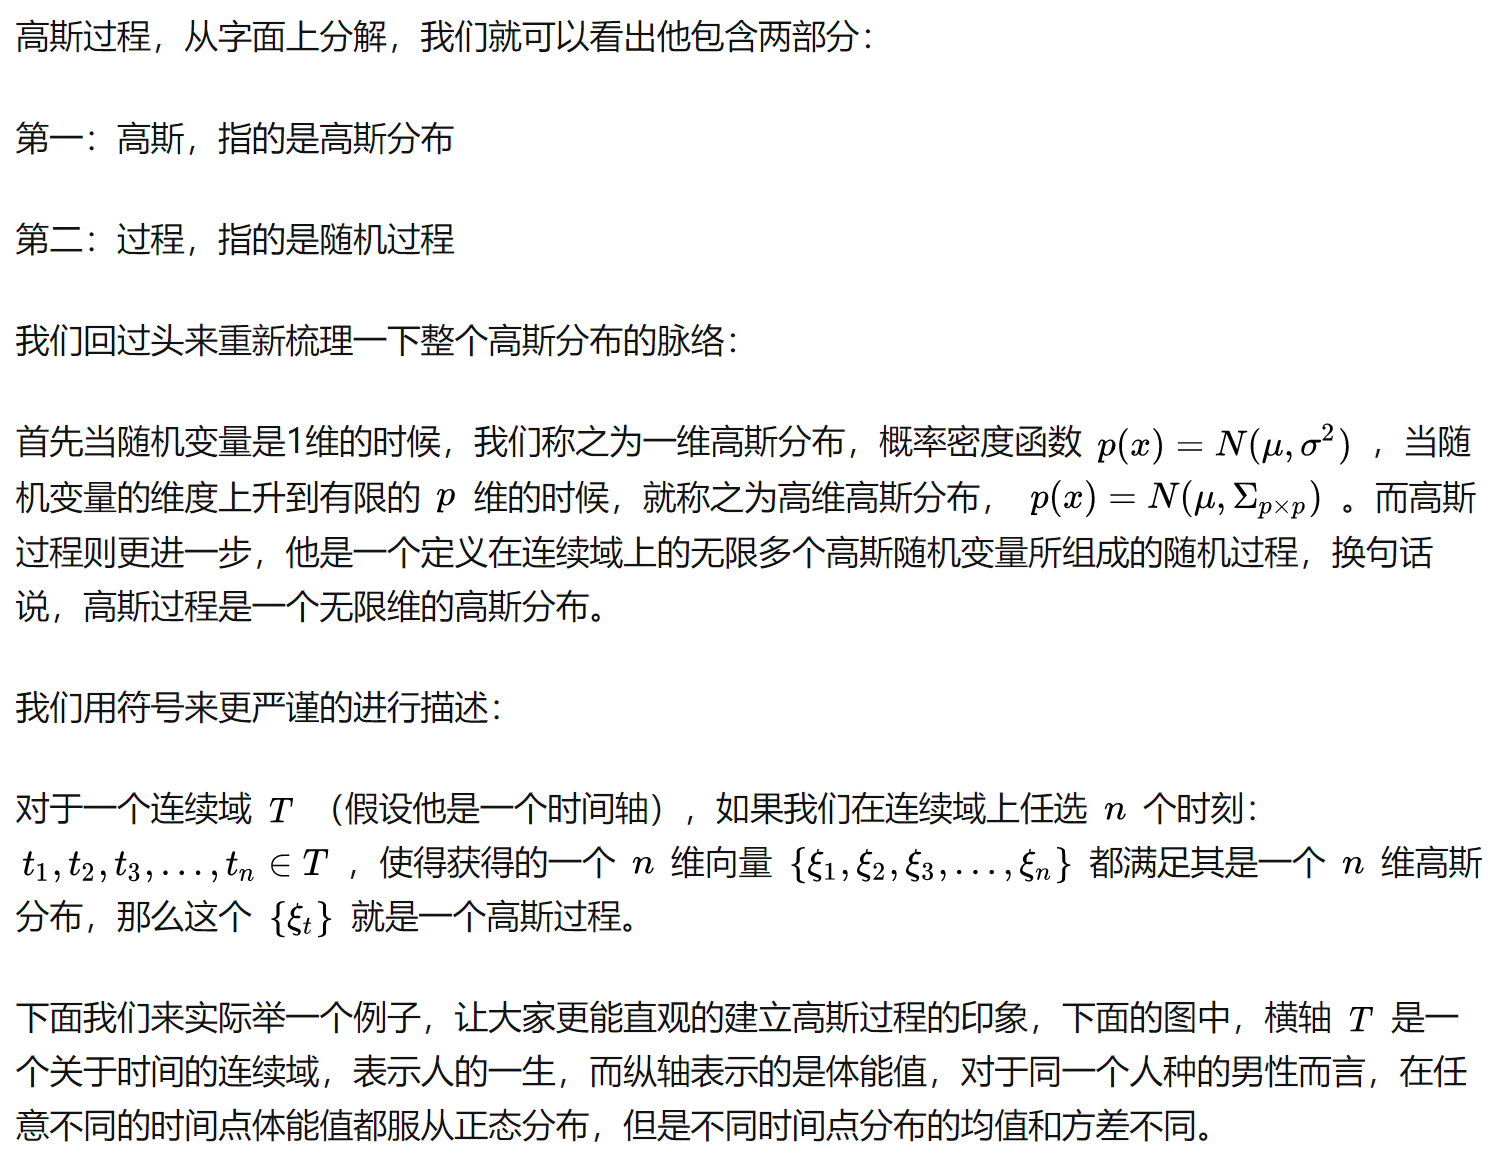
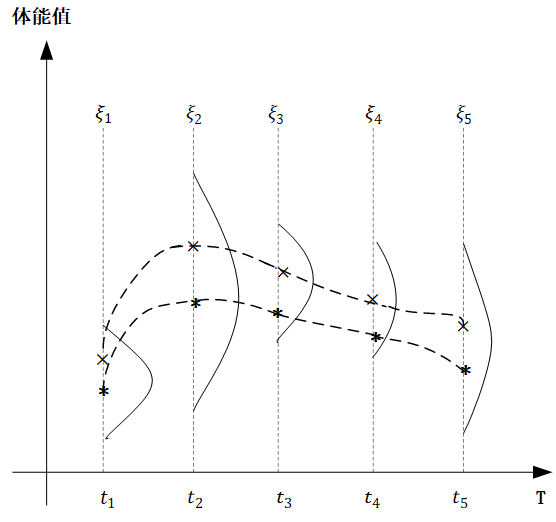
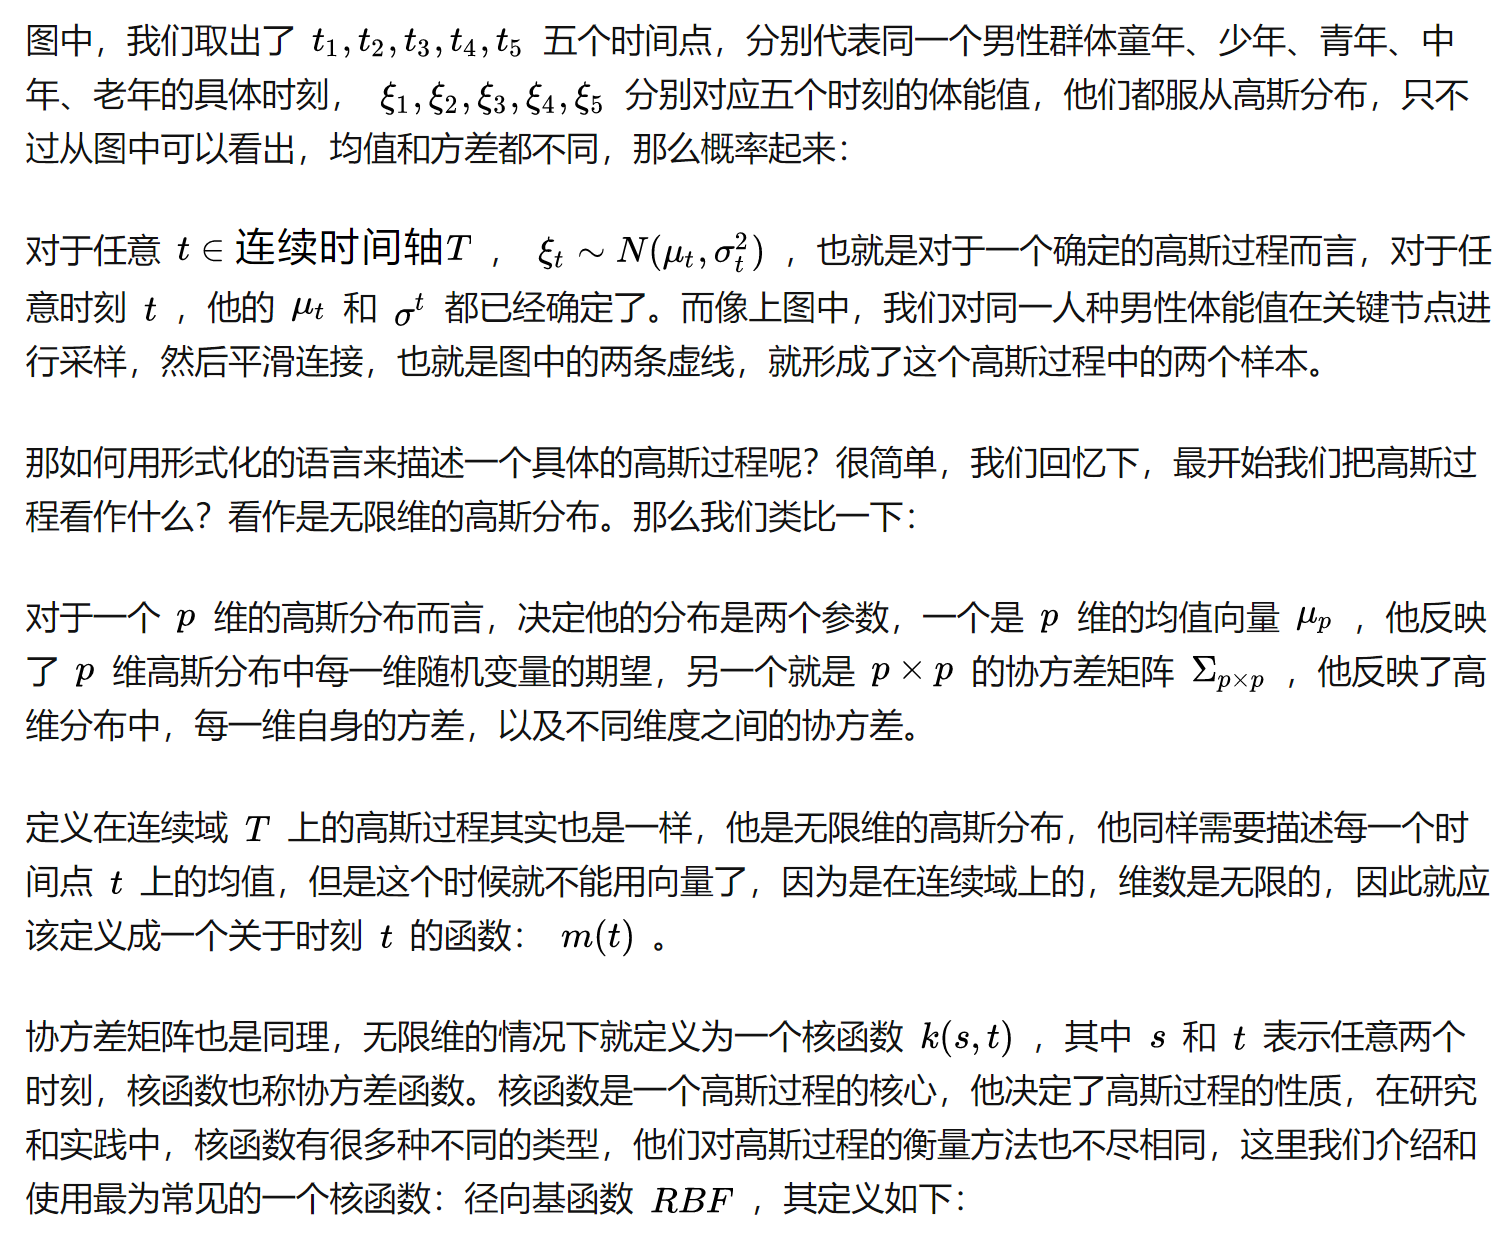
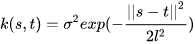
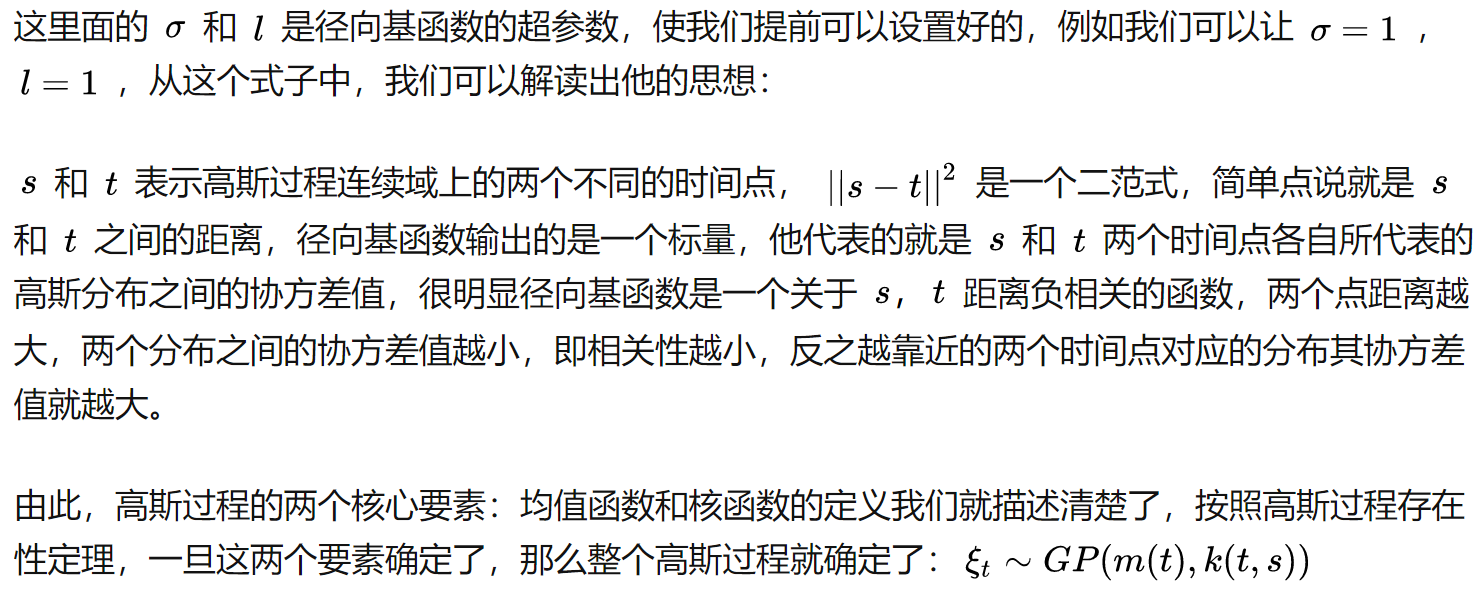

### Basic Concept and Kernel Function
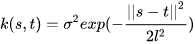
How to understand this kernel function: assume, s and t are two time points, the kernel function represnet the level of relation ebtween s and t, and this level is represented as an inverse relationship. 


### What is Gaussian Process Regression
1. This process can be treated as a compositon of prior and observation value, then compute the posterior
2. For Gaussian Distribution, a very useful property is the correlation probability, conditional probability, and marginal probability of N is still a N

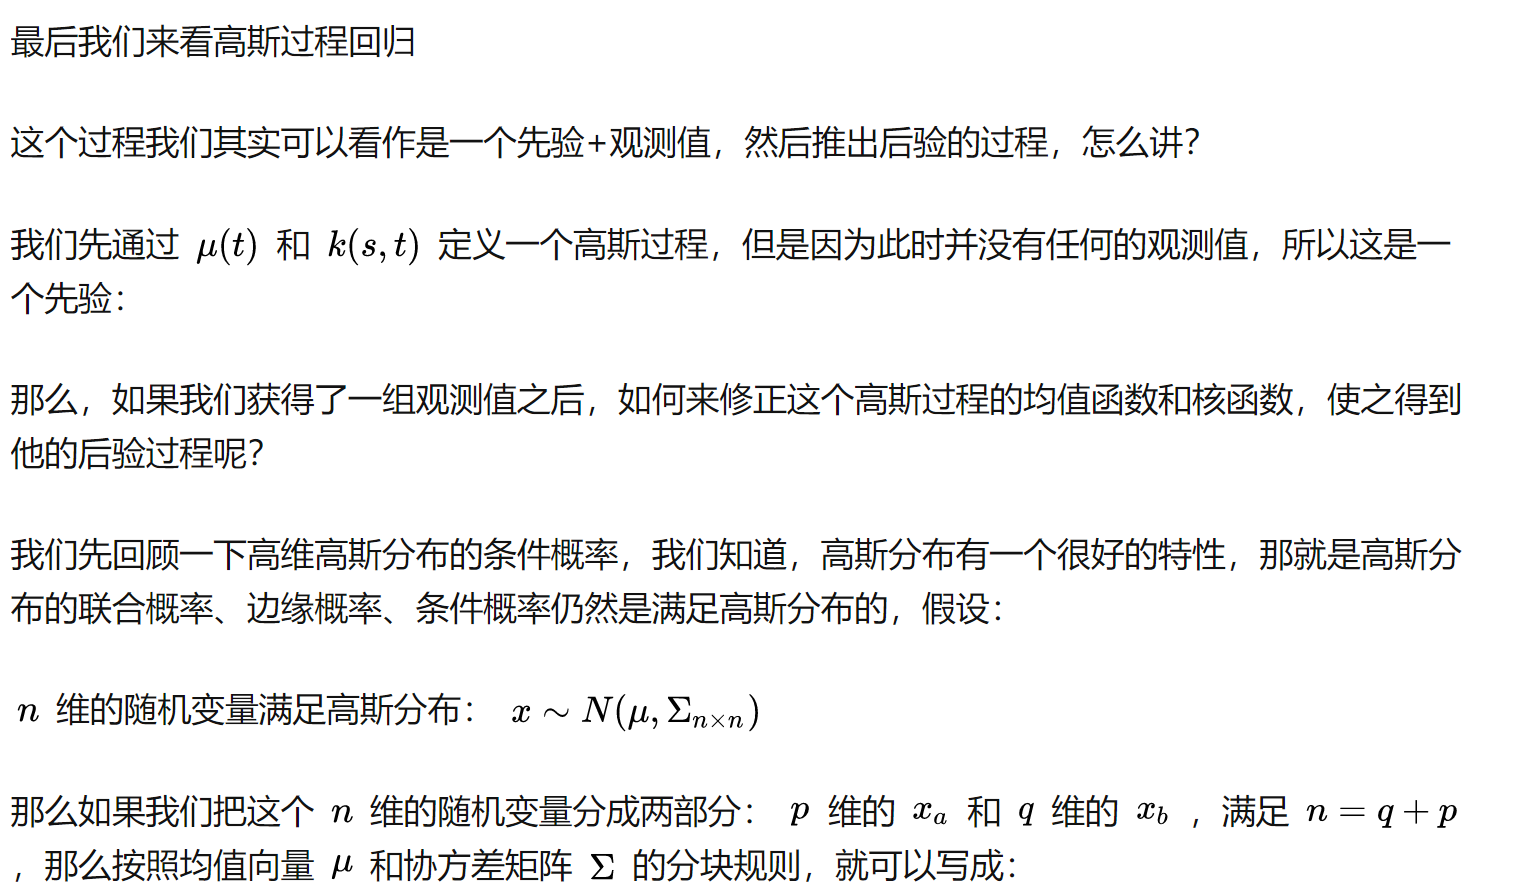
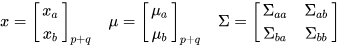
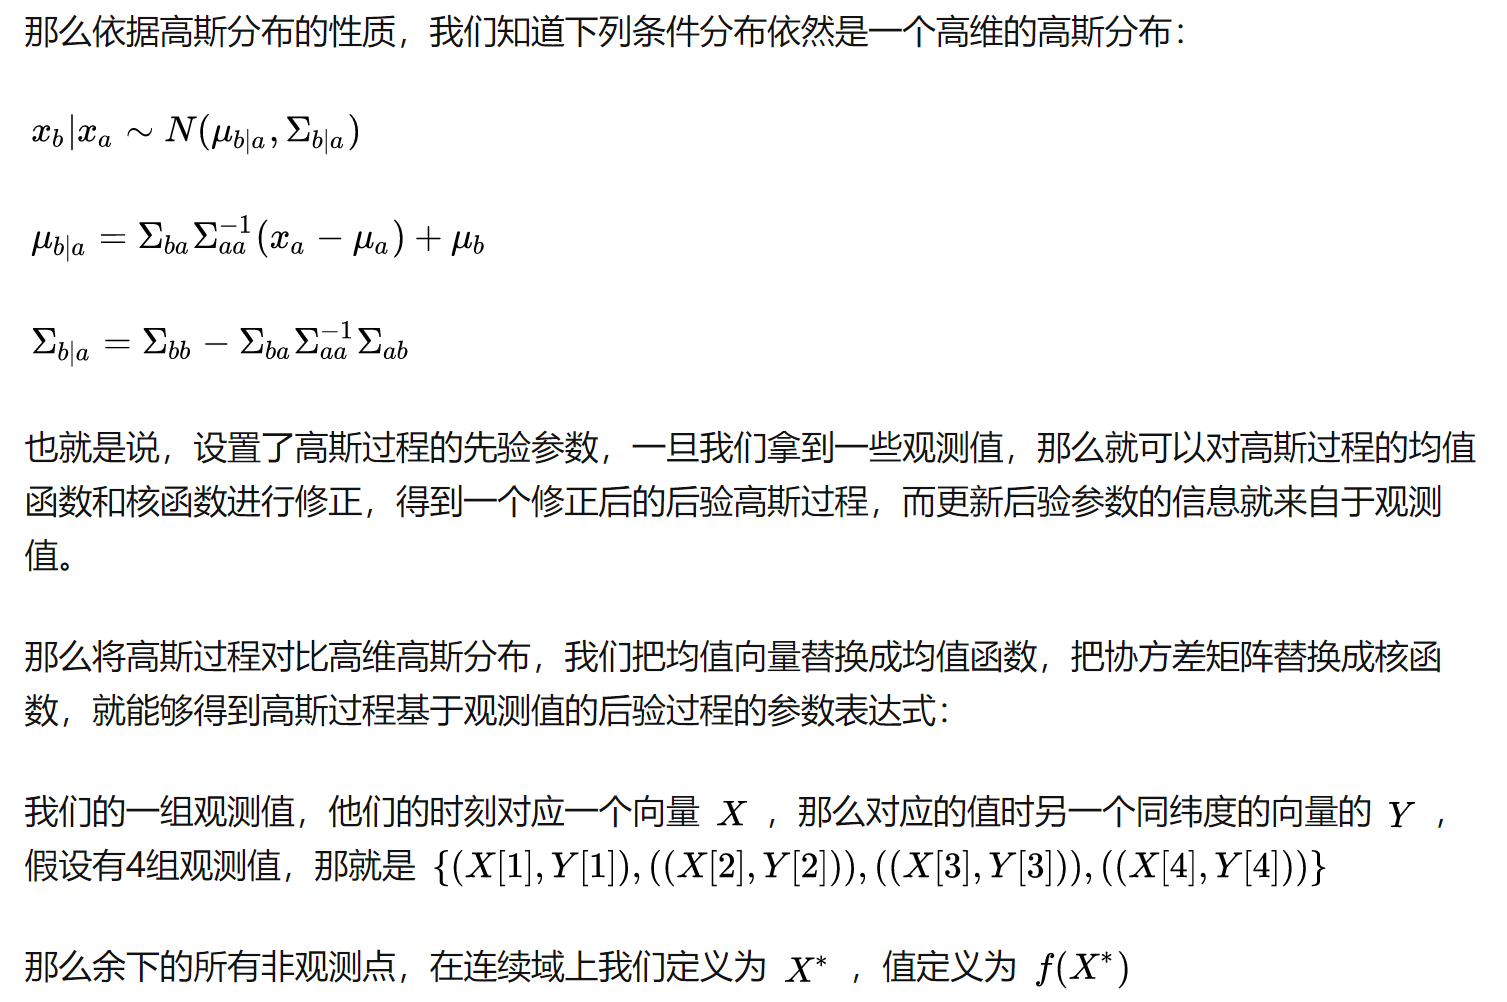
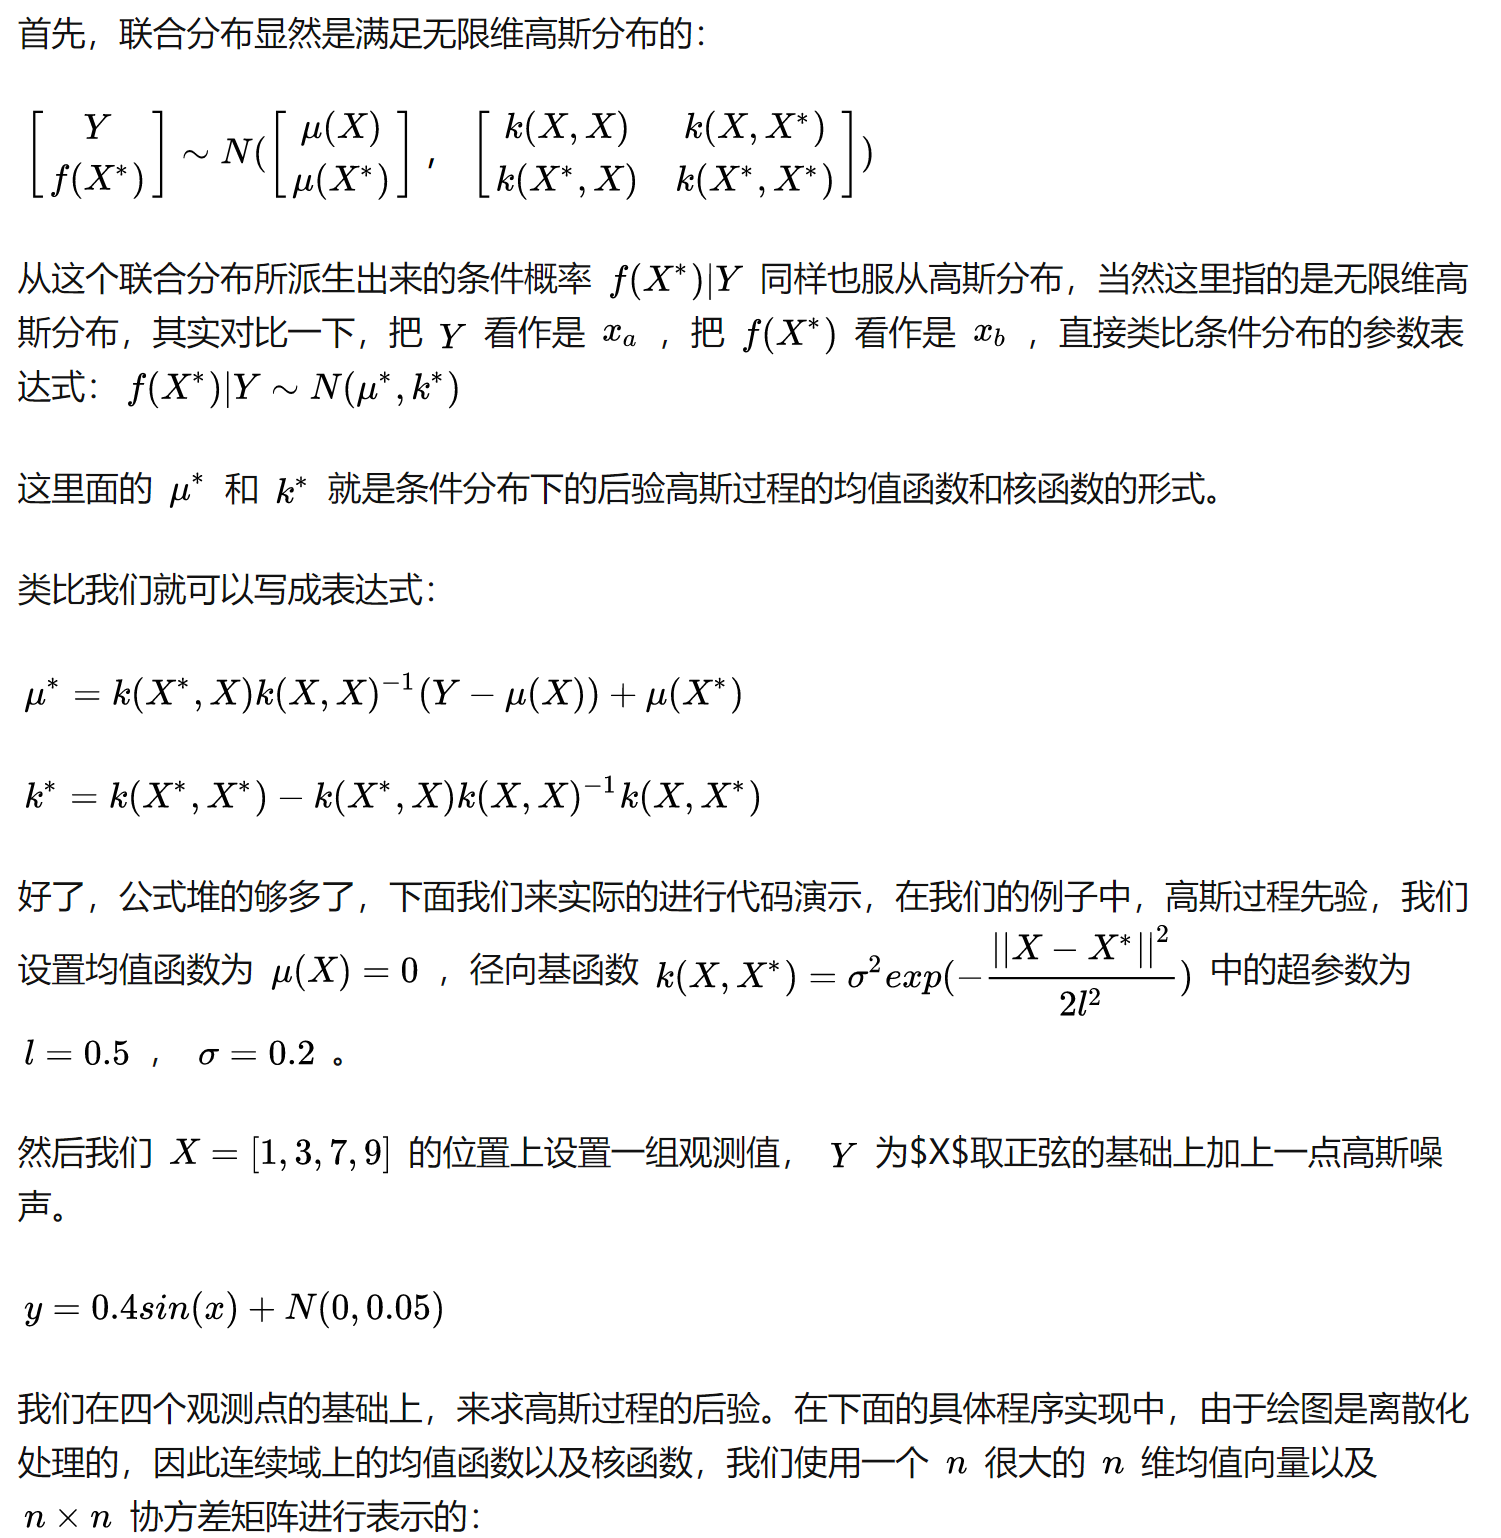

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def gaussian_kernel(x1, x2, l = 1.0, sigma_f = 1.0):
    m, n = x1.shape[0], x2.shape[0]
    dist_matrix = np.zeros((m, n), dtype = float)
    for i in range(m):
        for j in range(n):
            dist_matrix[i][j] = np.sum((x1[i] - x2[j]) ** 2)
    return sigma_f ** 2 *np.exp(-0.5 / 1 ** 2 * dist_matrix)


In [8]:
# convert the array to a matrix with shape 4 * 1
train_X = np.array([1, 3, 7, 9]).reshape(-1, 1)
print(gaussian_kernel(train_X, train_X))


[[1.00000000e+00 1.35335283e-01 1.52299797e-08 1.26641655e-14]
 [1.35335283e-01 1.00000000e+00 3.35462628e-04 1.52299797e-08]
 [1.52299797e-08 3.35462628e-04 1.00000000e+00 1.35335283e-01]
 [1.26641655e-14 1.52299797e-08 1.35335283e-01 1.00000000e+00]]


In [4]:
def getY(X):
    X = np.asarray(X)
    Y = np.sin(X) * 0.4 + np.random.normal(0, 0.05, size = X.shape)
    return Y.tolist()


In [10]:
# According to observation, correct the mean function and covariance matrix generated by Gaussian Process
def update(X, X_star):
    X = np.asarray(X)
    x_star = np.asarray(X_star)
    K_YY = gaussian_kernel(X, X)
    K_ff = gaussian_kernel(X_star, X_star)
    K_Yf = gaussian_kernel(X, X_star)
    K_fY = K_Yf.T
    K_YY_inv = np.linalg.inv(K_YY + 1e-8 * np.eye(len(X)))
    
    mu_star = K_fY.dot(K_YY_inv).dot(Y)
    cov_star = K_ff - K_fY.dot(K_YY_inv).dot(K_Yf)
    return mu_star, cov_star
    

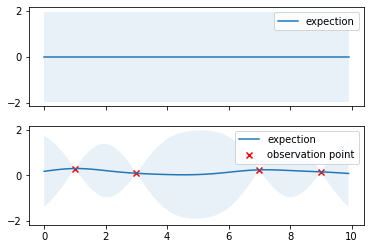

In [11]:
f, ax = plt.subplots(2, 1, sharex=True,sharey=True)
#绘制高斯过程的先验
X_pre = np.arange(0, 10, 0.1)
mu_pre = np.array([0]*len(X_pre))
Y_pre = mu_pre
cov_pre = gaussian_kernel(X_pre, X_pre)
uncertainty = 1.96 * np.sqrt(np.diag(cov_pre))#取95%置信区间
ax[0].fill_between(X_pre, Y_pre + uncertainty,Y_pre - uncertainty, alpha=0.1)
ax[0].plot(X_pre, Y_pre, label="expection")
ax[0].legend()


#绘制基于观测值的高斯过程后验
X = np.array([1, 3, 7, 9]).reshape(-1, 1)#4*1矩阵
Y = getY(X)
X_star = np.arange(0, 10, 0.1).reshape(-1, 1)
mu_star, cov_star = update(X, X_star)
Y_star = mu_star.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov_star))#取95%置信区间
ax[1].fill_between(X_star.ravel(), Y_star + uncertainty, Y_star - uncertainty, alpha=0.1)
ax[1].plot(X_star, Y_star, label="expection")
ax[1].scatter(X, Y, label="observation point", c="red", marker="x")
ax[1].legend()
plt.show()
